In [3]:
%load_ext autoreload
%autoreload 2

from lkf_tools.detection import *
from lkf_tools.rgps import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
test = read_RGPS('../data/RGPS/2005363_2006001.DIV')

In [11]:
rfile = open('../data/RGPS/2005363_2006001.DIV','r',encoding= 'unicode_escape')

In [15]:
test

(array([[1.e+10, 1.e+10, 1.e+10, ..., 1.e+20, 1.e+20, 1.e+20],
        [1.e+10, 1.e+10, 1.e+10, ..., 1.e+20, 1.e+20, 1.e+20],
        [1.e+10, 1.e+10, 1.e+10, ..., 1.e+20, 1.e+20, 1.e+20],
        ...,
        [1.e+20, 1.e+20, 1.e+20, ..., 1.e+10, 1.e+10, 1.e+10],
        [1.e+20, 1.e+20, 1.e+20, ..., 1.e+10, 1.e+10, 1.e+10],
        [1.e+20, 1.e+20, 1.e+20, ..., 1.e+10, 1.e+10, 1.e+10]],
       dtype=float32),
 -2300.0,
 1000.0,
 -1000.0,
 2100.0,
 264,
 248)

In [16]:
lon,lat = get_latlon_RGPS(test[1],test[2],test[3],test[4],test[5],test[6])

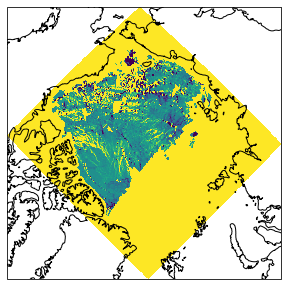

In [24]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=[10, 5])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))

ax.coastlines(zorder=3)

ax.pcolormesh(lon,lat,test[0],vmin=-1e-2,vmax=1e-2,transform=ccrs.PlateCarree())

In [25]:
import xarray as xr

data = xr.open_dataset('/Users/nhutter/Documents/Research/sirex/data/McGill/McGill_runno01_expno07_1997_daily_means.nc')

In [2]:
%load_ext autoreload
%autoreload 2

from lkf_tools.dataset import *

In [3]:
test = process_dataset('/Users/nhutter/Documents/Research/sirex/data/McGill/McGill_runno01_expno07_1997_daily_means.nc')

In [9]:
test.detect_lkfs(indexes=[0])

Compute deformation rates and detect features for day 1
Start detection routines


/Users/nhutter/Documents/Research/lkf_tools/lkf_tools/detection.py:96: RuntimeWarning: invalid value encountered in true_divide
  gaussian_field = field_nonnan_f/mask_nan_f
/Users/nhutter/Documents/Research/lkf_tools/lkf_tools/detection.py:1113: RuntimeWarning: Mean of empty slice
  eps_tot = np.nanmean(np.stack(eps_tot),axis=0)
/Users/nhutter/Documents/Research/lkf_tools/lkf_tools/detection.py:243: RuntimeWarning: invalid value encountered in true_divide
  dx = (seg_active[:,:,-1]-seg_active[np.arange(seg_active.shape[0]),:,-num_points])/np.stack([num_points-1,num_points-1],axis=1) - (seg_append-seg_active[:,:,-1])
/Users/nhutter/Documents/Research/lkf_tools/lkf_tools/detection.py:561: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(angle)/np.pi*180
/Users/nhutter/Documents/Research/lkf_tools/lkf_tools/detection.py:557: RuntimeWarning: invalid value encountered in true_divide
  f1 = (f1/np.sqrt(np.sum(f1**2))) # Normalize basis vector
/Users/nhutter/Documents/R

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 3 dimension(s)

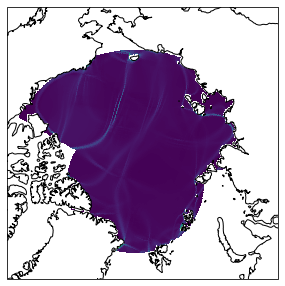

In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=[10, 5])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))

ax.coastlines(zorder=3)

ax.pcolormesh(test.lon[max([0,test.index_y[0][0]-1]):test.index_y[0][-1]+2:test.red_fac,
                       max([0,test.index_x[0][0]-1]):test.index_x[0][-1]+2:test.red_fac],
              test.lat[max([0,test.index_y[0][0]-1]):test.index_y[0][-1]+2:test.red_fac,
                       max([0,test.index_x[0][0]-1]):test.index_x[0][-1]+2:test.red_fac],
              np.sum(test.eps_tot_list,axis=0),transform=ccrs.PlateCarree())

In [11]:
test.lon[test.lon>180] -= 360

IndexError: 2-dimensional boolean indexing is not supported. 

In [12]:
test.lon.where(test.lon<180,other=test.lon-360)

<xarray.DataArray 'ULON' (y: 438, x: 518)>
array([[-105.96823  , -105.85332  , -105.737885 , ...,   -8.047913 ,
          -7.94223  ,   -7.837036 ],
       [-106.09569  , -105.980835 , -105.86545  , ...,   -7.921692 ,
          -7.816101 ,   -7.7109985],
       [-106.22366  , -106.10886  , -105.99353  , ...,   -7.794983 ,
          -7.689514 ,   -7.5844727],
       ...,
       [ 171.66559  ,  171.55157  ,  171.43701  , ...,   70.37024  ,
          70.26585  ,   70.16194  ],
       [ 171.53189  ,  171.41777  ,  171.30313  , ...,   70.50215  ,
          70.397644 ,   70.293625 ],
       [ 171.39871  ,  171.28452  ,  171.16978  , ...,   70.63358  ,
          70.52897  ,   70.42483  ]], dtype=float32)
Coordinates:
    VLON     (y, x) float32 253.9 254.0 254.1 254.3 ... 70.86 70.75 70.65 70.54
    VLAT     (y, x) float32 60.57 60.63 60.69 60.76 ... 60.09 60.02 59.96 59.89
    ULON     (y, x) float32 254.0 254.1 254.3 254.4 ... 70.74 70.63 70.53 70.42
    ULAT     (y, x) float32 60.57 60.63 60.7 60.76 ... 60.08 60.02 59.95 59.89
    TLON     (y, x) float32 254.0 254.1 254.2 254.3 ... 70.79 70.69 70.58 70.48
    TLAT     (y, x) float32 60.54 60.6 60.67 60.73 ... 60.12 60.05 59.98 59.92
Dimensions without coordinates: y, x
Attributes:
    standard_name:        longitude
    long_name:            longitude at U points
    units:                degrees_east
    _CoordinateAxisType:  Lon